In [1]:
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\Admin\.kaggle. Or use the environment method.


In [ ]:
!unzip credit-card-fraud-detection-dataset-2023.zip

In [ ]:
!rm -rf credit-card-fraud-detection-dataset-2023.zip
!mv creditcard_2023.csv ../../data/creditcard_2023.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <Ax

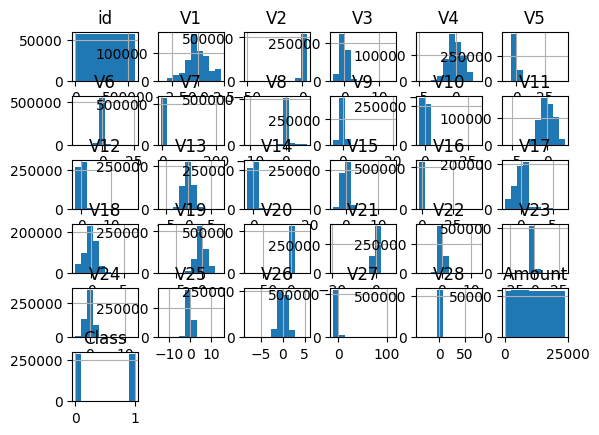

In [2]:
data = pd.read_csv('../../data/creditcard_2023.csv')
print(data.columns)
data.hist()

In [3]:
X = data.drop(columns=['id', 'Class'])
y = data['Class']

X.describe()

from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

# this takes a lot longer
# X, y = SMOTENC(categorical_features=[3,4,5,6]).fit_resample(X, y)
X, y = ADASYN().fit_resample(X, y)
# y.hist()

# Models

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_preds = logit_model.predict(X_test)

for pred, actual in zip(y_test[:20], y_preds[:20]):
    print(f'{actual} : {pred}')

0 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1


/Users/braydenchristensen/opt/anaconda3/envs/fraud-detection/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy: {logit_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 0.9580043261875033
Precision: 0.9794834218721378
F1 score: 0.9572487378710302
Recall: 0.9360011203304975
Confusion Matrix: 
[[27740   560]
 [ 1828 26735]]


In [6]:
# now I want to see the regression coefficients
dict(zip(logit_model.coef_.flatten(), X.columns))

{-0.5714449990482408: 'V1',
 0.04435615100753877: 'V2',
 -0.6967282091707611: 'V3',
 2.6537578384496063: 'V4',
 0.1094545928149338: 'V5',
 0.2155552698135728: 'V6',
 0.024308315877883322: 'V7',
 -0.7789440833533953: 'V8',
 -0.16128563753060216: 'V9',
 -0.4468491887070636: 'V10',
 0.86596252374676: 'V11',
 -1.5993471873246665: 'V12',
 -0.08753088453375901: 'V13',
 -1.8447329086710824: 'V14',
 -0.01791692257322968: 'V15',
 -0.4146631168060218: 'V16',
 0.08683946824231273: 'V17',
 -0.16171102843615984: 'V18',
 -0.26612429066188814: 'V19',
 0.02354560291278221: 'V20',
 0.27233227816497635: 'V21',
 0.4329941909270366: 'V22',
 -0.13475922180540525: 'V23',
 -0.002765840552135133: 'V24',
 0.04717777602077454: 'V25',
 -0.09027614313739206: 'V26',
 -0.059008621218473736: 'V27',
 0.09739253115147595: 'V28',
 3.196788901959617e-05: 'Amount'}

### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_preds = decision_tree_model.predict(X_test)

for pred, actual in zip(y_test[:20], y_preds[:20]):
    print(f'{actual} : {pred}')

1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1


In [8]:
print(f'Accuracy: {decision_tree_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 0.9978720785044757
Precision: 0.9973420997412045
F1 score: 0.997883023951572
Recall: 0.9984245352378952
Confusion Matrix: 
[[28224    76]
 [   45 28518]]


### XGBoost

In [9]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_preds = xgb_model.predict(X_test)

In [10]:
print(f'Accuracy: {xgb_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')
xgb_model.feature_importances_


Accuracy: 0.9995955190545698
Precision: 0.9991954103407262
F1 score: 0.9995975432640991
Recall: 1.0
Confusion Matrix: 
[[28277    23]
 [    0 28563]]


array([2.1487696e-02, 1.1444381e-02, 1.7301947e-02, 6.5447889e-02,
       8.4050940e-03, 8.2118418e-03, 1.2176614e-02, 2.1929834e-02,
       8.5928971e-03, 1.5689336e-02, 1.1945600e-02, 2.8840965e-02,
       1.1962385e-02, 6.3594002e-01, 6.7400574e-03, 1.0368802e-02,
       1.5200387e-02, 1.0491914e-02, 8.4292525e-03, 7.9566455e-03,
       5.4142978e-03, 6.8527251e-03, 8.5058557e-03, 8.4966524e-03,
       8.5230581e-03, 6.5822047e-03, 6.7490544e-03, 1.0194042e-02,
       1.1865870e-04], dtype=float32)

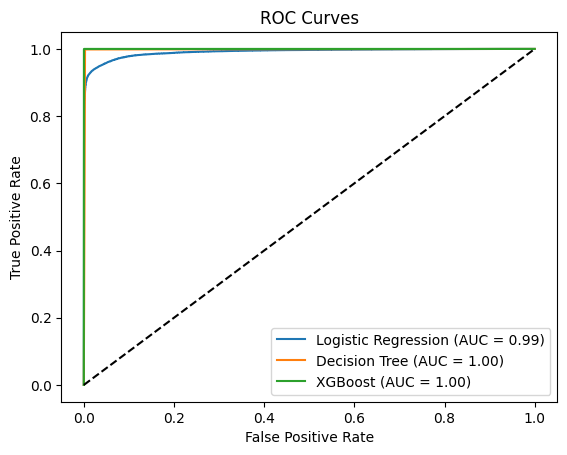

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for each model
logit_probs = logit_model.predict_proba(X_test)[:, 1]
dt_probs = decision_tree_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for each model
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Compute the AUC score for each model
logit_auc = roc_auc_score(y_test, logit_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Plot the ROC curves
plt.plot(logit_fpr, logit_tpr, label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# Show the plot
plt.show()

In [12]:
import statsmodels.api as sm
import numpy as np

# Fit logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Get summary statistics
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.120383
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               511767
Model:                          Logit   Df Residuals:                   511738
Method:                           MLE   Df Model:                           28
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                  0.8263
Time:                        10:29:58   Log-Likelihood:                -61608.
converged:                       True   LL-Null:                   -3.5473e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -0.4228      0.013    -33.320      0.000      -0.448      -0.398
V2             0.1011      0